## With the help of random forest classification implementaion we solve this problem

#### Context
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

In [128]:
#  Import the libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [129]:
#  Read the data set
df=pd.read_csv("Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

Data cleaning
1. Handling Missing values
2. Handling Duplicates
3. Check data type
4. Understand the dataset

In [131]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

Check the catgorical feautre

In [132]:
df.head(2)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0


In [133]:
#  Check all the categories
df["Gender"].unique()
df["Gender"]=df["Gender"].replace("Fe Male",'Female')
df["Gender"].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [134]:
df["Occupation"].unique()
df["TypeofContact"].unique()
df["ProductPitched"].unique()
df["MaritalStatus"].unique()
df["Designation"].unique()

array(['Manager', 'Executive', 'Senior Manager', 'AVP', 'VP'],
      dtype=object)

In [135]:
df["MaritalStatus"]=df["MaritalStatus"].replace('Single','Unmarried')

In [136]:
df.head(2)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0


In [137]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [138]:
#  Handling the missing vales
feature_with_nan=[feature for feature in df.columns if df[feature].isna().sum()>1]
for feature in feature_with_nan:
    print(feature,np.round(df[feature].isnull().mean()*100,5),'%missing value')


Age 4.62357 %missing value
TypeofContact 0.51146 %missing value
DurationOfPitch 5.13502 %missing value
NumberOfFollowups 0.92062 %missing value
PreferredPropertyStar 0.53191 %missing value
NumberOfTrips 2.86416 %missing value
NumberOfChildrenVisiting 1.35025 %missing value
MonthlyIncome 4.76678 %missing value


In [139]:
df[feature_with_nan].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


Imputing null valaues with
1. impute Median values for Age
2. mode -> type of contract
3. median -> Duration of pitch
4. mode -> numberofFollow
5. mode -> preferredpropertystar
6. median -> numberoftips
7. mode -> Numberofchilder Visiting
8. median -> monthlyincome

In [140]:
# Age
df["Age"].fillna(df["Age"].median(),inplace=True)
# TypeofContact
df["TypeofContact"].fillna(df["TypeofContact"].mode()[0],inplace=True)
# DurationOfPitch
df["DurationOfPitch"].fillna(df["DurationOfPitch"].median(),inplace=True)
# NumberOfFollowups
df["NumberOfFollowups"].fillna(df["NumberOfFollowups"].mode()[0],inplace=True)
# PreferredPropertyStar
df["PreferredPropertyStar"].fillna(df["PreferredPropertyStar"].mode()[0],inplace=True)
# NumberOfTrips
df["NumberOfTrips"].fillna(df["NumberOfTrips"].median(),inplace=True)
# NumberOfChildrenVisiting 
df["NumberOfChildrenVisiting"].fillna(df["NumberOfChildrenVisiting"].mode()[0],inplace=True)
# MonthlyIncome 
df["MonthlyIncome"].fillna(df["MonthlyIncome"].median(),inplace=True)

In [141]:
df.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [142]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [143]:
df.drop("CustomerID",axis=1,inplace=True)

In [144]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Feature Engineering

In [145]:
#  Create new column for feature
df["Totalvisiting"]=df["NumberOfChildrenVisiting"]+df["NumberOfPersonVisiting"]
df.drop(columns=["NumberOfChildrenVisiting","NumberOfPersonVisiting"],axis=1,inplace=True)

In [146]:
#  get all the numerical feature 
num_feature=[feature for feature in df.columns if df[feature].dtype != "object"]
print("num_feature",len(num_feature))
# get all the categorical feature
categorical_feature=[feature for feature in df.columns if df[feature].dtype == "object"]
print("categorical_feature",len(categorical_feature))

num_feature 12
categorical_feature 6


In [147]:
#  get all the descride feature
descride_feature=[feature for feature in num_feature if len(df[feature].unique())<=25]
print("descride_feature",len(descride_feature))

# Continuous feature
continue_feature=[feature for feature in num_feature if feature not in descride_feature]
print("continue_feature",len(continue_feature))


descride_feature 9
continue_feature 3


In [148]:
#  Split the model:
from sklearn.model_selection import train_test_split
X=df.drop(["ProdTaken"],axis=1)
y=df["ProdTaken"]

In [149]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [150]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Totalvisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [151]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
X_train.shape,X_test.shape

((3421, 17), (1467, 17))

In [152]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   object 
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfFollowups       4888 non-null   float64
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [153]:
#  Create column Transformer with 3type of transformer
Cat_feature=X.select_dtypes(include="object").columns
numeric_feature=X.select_dtypes(exclude="object").columns

In [154]:
#  Import liberies
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_standerd=StandardScaler()
One_HotEncoder=OneHotEncoder(drop="first")

preprocessor=ColumnTransformer([
    ("One_HotEncoder",One_HotEncoder,Cat_feature),
    ("StandardScaler",numeric_standerd,numeric_feature)
])

In [155]:
preprocessor


ColumnTransformer(transformers=[('One_HotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'Totalvisiting'],
      dtype='object'))])

In [156]:
# Apply tranformation in  train and test
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

### Random forest classifer Training

In [157]:
#   model import
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,  precision_score,recall_score,f1_score,roc_auc_score,accuracy_score

In [158]:
models={
    "RandomForestClassifier":RandomForestClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier()

}

for  i in range (len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train) # model Traning


    # make prediction
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)


    #  Traning set performance
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred,average="weighted")
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_roc_auc_score=roc_auc_score(y_train,y_train_pred)


    #  Testing set performance
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred)
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_roc_auc_score=roc_auc_score(y_test,y_test_pred)


    # Print the training perforamnce


    print(list(models.keys())[i])
    print("Model performance for training set")
    print("model_train_precision:",model_train_precision)
    print("model_train_accuracy  :",model_train_accuracy)
    print("model_train_f1",model_train_f1)
    print("model_train_recall:",model_train_recall)
    print("model_train_roc_auc_score:",model_train_roc_auc_score)

    print("\n")
    print("*******************************************************************************************************************************************")

    # print the testing performance
    print(" Model performance for testing set")
    print("model_test_precision: ",model_test_precision)
    print("model_test_accuracy: ",model_test_accuracy)
    print("model_test_f1 :",model_test_f1)
    print("model_test_recall :",model_test_recall)
    print("model_test_roc_auc_score :",model_test_roc_auc_score)
    print("****************************************************************************************************************************************")



RandomForestClassifier
Model performance for training set
model_train_precision: 1.0
model_train_accuracy  : 1.0
model_train_f1 1.0
model_train_recall: 1.0
model_train_roc_auc_score: 1.0


*******************************************************************************************************************************************
 Model performance for testing set
model_test_precision:  0.9340659340659341
model_test_accuracy:  0.9209270620313565
model_test_f1 : 0.7456140350877193
model_test_recall : 0.6204379562043796
model_test_roc_auc_score : 0.805189640298334
****************************************************************************************************************************************
DecisionTreeClassifier
Model performance for training set
model_train_precision: 1.0
model_train_accuracy  : 1.0
model_train_f1 1.0
model_train_recall: 1.0
model_train_roc_auc_score: 1.0


************************************************************************************************************

Hyperparameter tununig

In [159]:
rf_params={
    "max_depth":[5,8,15,None,10],
    "max_features":[5,7,"auto",8],
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100,200,500,1000]}

In [160]:
# model list for hyperparamter tuning
randomcv_model=[
    ("rf",RandomForestClassifier(),rf_params),
]

In [161]:
randomcv_model

[('rf',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [162]:
# import model
from sklearn.model_selection import RandomizedSearchCV
model_param={}

for name ,model, params in randomcv_model:
    random=RandomizedSearchCV(estimator=model,
                              param_distributions=params,
                              n_iter=100,
                              cv=5,
                              verbose=2,n_jobs=-1)
    #  fit the model
    random.fit(X_train,y_train)
    model_param[name]=random.best_params_


for model_name in model_param:
    print(F"--------------------------------Best Params for {model_name}___________________________")
    print(model_param[model_name])

Fitting 5 folds for each of 100 candidates, totalling 500 fits
--------------------------------Best Params for rf___________________________
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


ReTrain the model

In [163]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier1=RandomForestClassifier(n_estimators=200,min_samples_split=2,max_features=8,max_depth=None)

In [164]:
#  Fit the model
RandomForestClassifier1.fit(X_train,y_train)

#  prediction of the model
# Training
y1_train_pred=RandomForestClassifier1.predict(X_train)
# Testing
y1_test_pred=RandomForestClassifier1.predict(X_test)

Performance metrices

In [165]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score,roc_auc_score,roc_curve,recall_score

#  For performance matrices in training dataset
print("performance of training dataset")
print("accuracy_score \n",accuracy_score(y1_train_pred,y_train))
print("confusion_matrix: \n",confusion_matrix(y1_train_pred,y_train))
print("classification_report :\n",classification_report(y1_train_pred,y_train))
print("f1_score  :\n",f1_score(y_train,y1_train_pred))
print("roc_auc_score \n",roc_auc_score(y_train,y1_train_pred))
print("recall_score \n",recall_score(y_train,y1_train_pred))
print("______________________________________________________________________________________________________________")

# for performance metrices in testing dataset
print("performance of training dataset")
print("accuracy_score \n",accuracy_score(y1_test_pred,y_test))
print("confusion_matrix:\n",confusion_matrix(y1_test_pred,y_test))
print("classification_report : \n",classification_report(y1_test_pred,y_test))
print("f1_score  : \n",f1_score(y_test,y1_test_pred))
print("roc_auc_score \n",roc_auc_score(y_test,y1_test_pred))
print("recall_score",recall_score(y_test,y1_test_pred))



performance of training dataset
accuracy_score 
 1.0
confusion_matrix: 
 [[2775    0]
 [   0  646]]
classification_report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2775
           1       1.00      1.00      1.00       646

    accuracy                           1.00      3421
   macro avg       1.00      1.00      1.00      3421
weighted avg       1.00      1.00      1.00      3421

f1_score  :
 1.0
roc_auc_score 
 1.0
recall_score 
 1.0
______________________________________________________________________________________________________________
performance of training dataset
accuracy_score 
 0.9263803680981595
confusion_matrix:
 [[1179   94]
 [  14  180]]
classification_report : 
               precision    recall  f1-score   support

           0       0.99      0.93      0.96      1273
           1       0.66      0.93      0.77       194

    accuracy                           0.93      1467
   macro avg       0.82

Visulization of roc curve

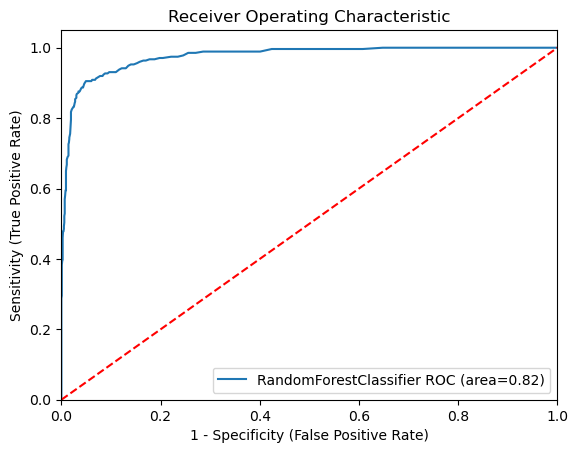

In [166]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create the model
RandomForestClassifier1 = RandomForestClassifier(
    n_estimators=200, 
    min_samples_split=2, 
    max_features=8, 
    max_depth=None
)

plt.figure()

# Add model to list
auc_models = [
    {
        "label": "RandomForestClassifier",
        "model": RandomForestClassifier1,
        "roc": 0.817
    }
]

# Loop through all models
for algo in auc_models:
    model1 = algo["model"]  # select the model
    model1.fit(X_train, y_train)  # train the model

    # calculate the false positive rate and true positive rate
    fpr, tpr, threshold = roc_curve(y_test, model1.predict_proba(X_test)[:, 1])

    # plot ROC curve
    plt.plot(fpr, tpr, label='%s ROC (area=%0.2f)' % (algo["label"], algo["roc"]))

# Custom settings for the plot
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.savefig("aug.png")
plt.show()
